<a href="https://colab.research.google.com/github/Hasnat65/thesis42/blob/master/Residual_Attention_Network_Implementation_Cats_vs_Dogs_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Residual Attention Network

In [0]:
import sys
sys.path.append("..")

from ResidualAttentionNetwork import ResidualAttentionNetwork

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

import h5py

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

Using TensorFlow backend.


# Network Metadata 

# Image Generators

For data, download from Kaggle: https://www.kaggle.com/c/dogs-vs-cats

In [0]:
pip install kaggle

In [60]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasnatkabir65","key":"c8af97cd74035b1afe1939e4bda45ab8"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 6000 ~/.kaggle/kaggle.json

In [62]:
#!kaggle competitions download -c dogs-vs-cats
!kaggle datasets download -d chetankv/dogs-cats-images

 97% 423M/435M [00:03<00:00, 92.0MB/s]
100% 435M/435M [00:03<00:00, 116MB/s] 


**Unzipping data set**

In [0]:
import os
print(os.listdir('../content/train'))

In [0]:
from zipfile import ZipFile
filename= "dogs-cats-images.zip"
with ZipFile(filename,'r') as zip:
    zip.extractall()

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=.3
)

In [0]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

batch_size=32

epochs = 32

In [68]:
train_generator = train_datagen.flow_from_directory(
    directory="../content/dataset/training_set/", 
    shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    batch_size=batch_size,
 
)

valid_generator = train_datagen.flow_from_directory(
    directory="../content/dataset/test_set", 
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="binary",
    color_mode='grayscale',
    shuffle=True,
   
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
import os
print(os.listdir('../content/dog vs cat'))

['dataset']


In [0]:
count = sum([len(files) for r, d, files in os.walk("../content/dataset/test_set")])
print(count)

2000


In [72]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
 


250

In [73]:
model = ResidualAttentionNetwork((IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), 1, activation='sigmoid').build_model()

model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN, verbose=1,
                    validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)

Epoch 1/32
250/250 [==============================] - 393s 2s/step - loss: 1.5791 - acc: 0.4999 - val_loss: 0.6942 - val_acc: 0.4990
Epoch 2/32
250/250 [==============================] - 329s 1s/step - loss: 0.6935 - acc: 0.5032 - val_loss: 0.6931 - val_acc: 0.5005
Epoch 3/32
250/250 [==============================] - 329s 1s/step - loss: 0.6934 - acc: 0.4901 - val_loss: 0.6931 - val_acc: 0.5036
Epoch 4/32
250/250 [==============================] - 328s 1s/step - loss: 0.6933 - acc: 0.4933 - val_loss: 0.6931 - val_acc: 0.5036
Epoch 5/32
250/250 [==============================] - 330s 1s/step - loss: 0.6933 - acc: 0.4947 - val_loss: 0.6932 - val_acc: 0.4975
Epoch 6/32
250/250 [==============================] - 328s 1s/step - loss: 0.6932 - acc: 0.5046 - val_loss: 0.6932 - val_acc: 0.4975
Epoch 7/32
250/250 [==============================] - 328s 1s/step - loss: 0.6933 - acc: 0.4910 - val_loss: 0.6931 - val_acc: 0.5046
Epoch 8/32
250/250 [==============================] - 328s 1s/step - 

In [0]:
model.save("cats-vs-dogs-model.h5")

# Visualize Data 

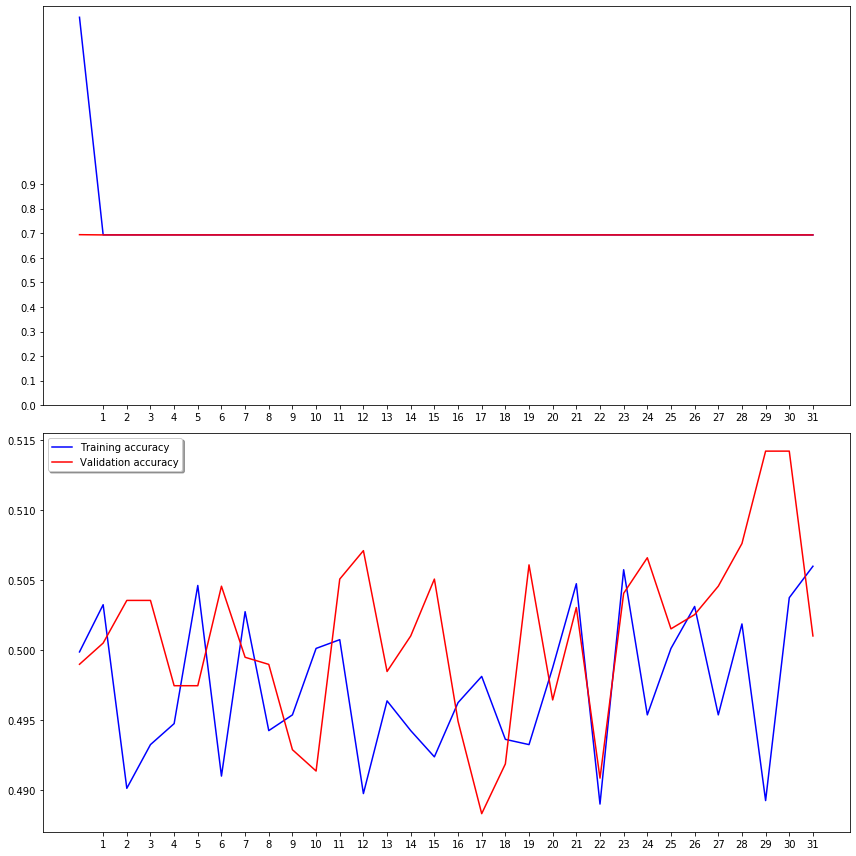

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Evaluate Model on Validation Data

In [75]:
loss, accuracy = model. evaluate_generator(valid_generator, STEP_SIZE_VALID, verbose=1)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

62/62 [==============================] - 27s 432ms/step
Test: accuracy = 0.500504  ;  loss = 0.693147 


Other Links
https://arxiv.org/pdf/1704.06904.pdf
https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33
https://towardsdatascience.com/review-residual-attention-network-attention-aware-features-image-classification-7ae44c4f4b8
https://sebastianwallkoetter.wordpress.com/2018/04/08/layered-layers-residual-blocks-in-the-sequential-keras-api/
https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
https://medium.com/deepreview/review-of-identity-mappings-in-deep-residual-networks-ad6533452f33
https://arxiv.org/pdf/1512.03385.pdf
https://www.d2l.ai/chapter_convolutional-modern/resnet.html
https://towardsdatascience.com/understanding-residual-networks-9add4b664b03
https://arxiv.org/pdf/1603.05027.pdf